Finding insights from sentiment extracted from _anything_else_ column from Apr'20 and Apr'21 ProlificAcademic data

In [1]:
# Importing packages
%pylab inline

import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [3]:
path = "Data/ProlificAcademic/April 2020/Data"

## Read data

This data set contains common users across four time frames and some selected featues

In [4]:
df_adult_sel_feat = pd.read_csv('adult_data_sel_features.csv')
print(df_adult_sel_feat.shape)
df_adult_sel_feat.head()

(1184, 26)


,ID,country,age,sex,informant_race2,location,insurance_Apr_20,govassist,physicalhealth_Apr_20,Apr_cms_ave,Apr_cw_ave,Apr_lc_subtype,financedifficulty_Apr_20,May_cms_ave,May_cw_ave,May_lc_subtype,financedifficulty_May_20,physicalhealth_Nov_20,Nov_cms_ave,Nov_cw_ave,Nov_lc_subtype,financedifficulty_Nov_20,insurance_Apr_21,Apr_21_cms_ave,Apr_21_cw_ave,financedifficulty_Apr_21
0,00769460,186.0,42.0,1.0,White,1.0,7.0,0.0,2.0,2.2,1.833333,3.0,4.0,1.7,1.666667,3.0,3.0,1.0,1.6,2.000000,1.0,1.0,7.0,1.8,1.500000,2.0
1,00babb90,186.0,29.0,2.0,White,1.0,2.0,0.0,3.0,3.7,2.500000,2.0,3.0,4.1,3.666667,2.0,4.0,2.0,3.5,2.833333,2.0,1.0,2.0,2.8,2.166667,4.0
2,00db60f1,186.0,53.0,2.0,White,4.0,7.0,1.0,1.0,3.2,2.500000,2.0,3.0,3.1,2.666667,2.0,4.0,1.0,2.8,2.666667,1.0,3.0,7.0,2.9,2.166667,2.0
3,01297d76,186.0,51.0,2.0,Other,2.0,6.0,0.0,2.0,2.5,3.166667,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,7.0,1.8,2.333333,1.0
4,01559bfb,187.0,37.0,2.0,White,1.0,2.0,0.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,2.0,2.0,2.5,2.500000,2.0


In [5]:
df_parent_sel_feat = pd.read_csv('parent_data_sel_features.csv')
print(df_parent_sel_feat.shape)
df_parent_sel_feat.head()

(897, 26)


,ID,country,age,sex,informant_race2,location,insurance_Apr_20,govassist,physicalhealth_Apr_20,Apr_cms_ave,Apr_cw_ave,Apr_lc_subtype,financedifficulty_Apr_20,May_cms_ave,May_cw_ave,May_lc_subtype,financedifficulty_May_20,physicalhealth_Nov_20,Nov_cms_ave,Nov_cw_ave,Nov_lc_subtype,financedifficulty_Nov_20,insurance_Apr_21,Apr_21_cms_ave,Apr_21_cw_ave,financedifficulty_Apr_21
0,003f374a,186.0,35.0,1.0,White,4.0,7.0,1.0,2.0,2.4,2.5,2.0,3.0,2.7,2.666667,2.0,3.0,3.0,2.5,2.000000,1.0,2.0,7,1.9,2.333333,1.0
1,00662b3f,186.0,32.0,2.0,White,1.0,6.0,0.0,5.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,3.0,7,2.4,1.166667,3.0
2,00b76a23,187.0,27.0,1.0,White,2.0,2.0,0.0,1.0,2.1,1.5,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2,1.6,1.333333,1.0
3,00f4a445,186.0,34.0,2.0,White,4.0,7.0,0.0,1.0,2.6,4.0,3.0,1.0,2.5,3.000000,2.0,1.0,1.0,1.9,2.333333,1.0,2.0,7,1.6,1.333333,3.0
4,0145f511,187.0,32.0,1.0,White,3.0,2.0,0.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,2,2.7,2.166667,1.0


In [6]:
df_any_else_adult_emot_sen = pd.read_csv("df_adult_any_01122021.csv")
df_any_else_parent_emot_sen = pd.read_csv("df_parent_any_01122021.csv")

In [7]:
print(df_any_else_adult_emot_sen.shape)
df_any_else_adult_emot_sen.sample(2)

(1602, 7)


,ID,anything_else_April2020,anything_else_April2021,emotion_April2020,sentiment_April2020,emotion_April2021,sentiment_April2021
709,72443c8e,NaN,NaN,NaN,NaN,NaN,NaN
1111,b3e92d98,unable to travel on public transport to places...,only those previously listed,sadness,"('NEGATIVE', 0.99947226)",anger,"('NEGATIVE', 0.98958606)"


In [8]:
print(df_any_else_parent_emot_sen.shape)
df_any_else_parent_emot_sen.sample(2)

(1205, 7)


,ID,anything_else_April2020,anything_else_April2021,emotion_April2020,sentiment_April2020,emotion_April2021,sentiment_April2021
60,0cba8ecc,mainly mental impact. Its difficult to live wi...,The main thing has been missing out on swimmin...,sadness,"('NEGATIVE', 0.9980458)",sadness,"('NEGATIVE', 0.9985011)"
415,54839756,Nothing at this time.,none,sadness,"('NEGATIVE', 0.99701375)",NaN,NaN


## Trend of mood, worries and life changes

<h4> Adults

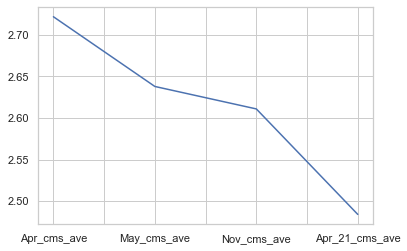

In [9]:
df_adult_sel_feat[['Apr_cms_ave', 'May_cms_ave', 'Nov_cms_ave', 'Apr_21_cms_ave']].mean().plot();

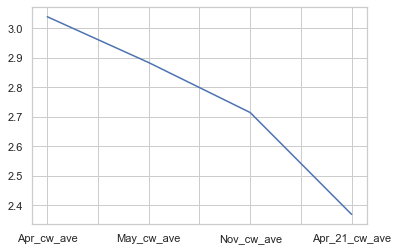

In [10]:
df_adult_sel_feat[['Apr_cw_ave', 'May_cw_ave', 'Nov_cw_ave', 'Apr_21_cw_ave']].mean().plot();

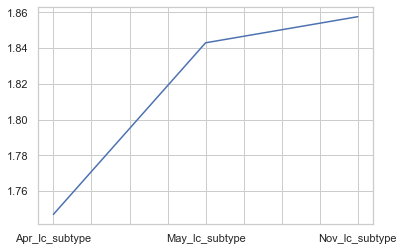

In [11]:
df_adult_sel_feat[['Apr_lc_subtype', 'May_lc_subtype', 'Nov_lc_subtype']].mean().plot();

<h4> Parents

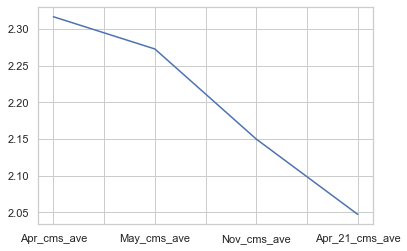

In [12]:
df_parent_sel_feat[['Apr_cms_ave', 'May_cms_ave', 'Nov_cms_ave', 'Apr_21_cms_ave']].mean().plot();

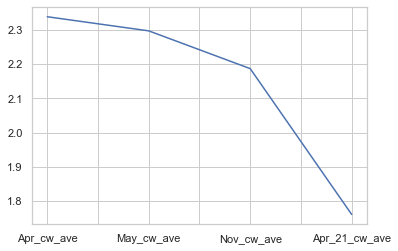

In [13]:
df_parent_sel_feat[['Apr_cw_ave', 'May_cw_ave', 'Nov_cw_ave', 'Apr_21_cw_ave']].mean().plot();

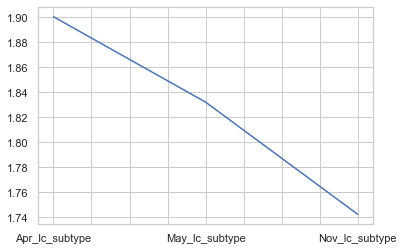

In [14]:
df_parent_sel_feat[['Apr_lc_subtype', 'May_lc_subtype', 'Nov_lc_subtype']].mean().plot();

<h3> Overall trend of mood states, covid worries is declining for adults and parents

# Sentiment anlysis

## Sentiment analysis for Adults

Merging the adult data with, corresponding sentiment info

In [15]:
df_adult_mer = df_adult_sel_feat.merge(df_any_else_adult_emot_sen,on='ID')

print(df_adult_mer.shape)
df_adult_mer.head()

(1173, 32)


,ID,country,age,sex,informant_race2,location,insurance_Apr_20,govassist,physicalhealth_Apr_20,Apr_cms_ave,Apr_cw_ave,Apr_lc_subtype,financedifficulty_Apr_20,May_cms_ave,May_cw_ave,May_lc_subtype,financedifficulty_May_20,physicalhealth_Nov_20,Nov_cms_ave,Nov_cw_ave,Nov_lc_subtype,financedifficulty_Nov_20,insurance_Apr_21,Apr_21_cms_ave,Apr_21_cw_ave,financedifficulty_Apr_21,anything_else_April2020,anything_else_April2021,emotion_April2020,sentiment_April2020,emotion_April2021,sentiment_April2021
0,00babb90,186.0,29.0,2.0,White,1.0,2.0,0.0,3.0,3.7,2.500000,2.0,3.0,4.1,3.666667,2.0,4.0,2.0,3.5,2.833333,2.0,1.0,2.0,2.8,2.166667,4.0,Mental health is declining and I cant see my f...,"normality and how we will adapt, social anxierty",sadness,"('NEGATIVE', 0.99907184)",anger,"('POSITIVE', 0.995627)"
1,00db60f1,186.0,53.0,2.0,White,4.0,7.0,1.0,1.0,3.2,2.500000,2.0,3.0,3.1,2.666667,2.0,4.0,1.0,2.8,2.666667,1.0,3.0,7.0,2.9,2.166667,2.0,Some family members not observing social dista...,Worries they may be lonely,fear,"('NEGATIVE', 0.99874055)",sadness,"('NEGATIVE', 0.9944463)"
2,01297d76,186.0,51.0,2.0,Other,2.0,6.0,0.0,2.0,2.5,3.166667,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,7.0,1.8,2.333333,1.0,My kids university education has been disrupte...,My kids are missing out on in-person learning ...,fear,"('NEGATIVE', 0.9990679)",sadness,"('NEGATIVE', 0.99879074)"
3,01559bfb,187.0,37.0,2.0,White,1.0,2.0,0.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,2.0,2.0,2.5,2.500000,2.0,NaN,I lost touch with friends whom I didn't see ve...,NaN,NaN,sadness,"('NEGATIVE', 0.9943974)"
4,0180ea1d,186.0,58.0,2.0,White,4.0,6.0,1.0,4.0,2.7,3.166667,2.0,1.0,2.9,3.000000,3.0,2.0,4.0,3.1,3.500000,2.0,1.0,7.0,2.9,2.833333,1.0,I am really concerned I could die if I catch it,no,fear,"('NEGATIVE', 0.998409)",anger,"('NEGATIVE', 0.9980653)"


In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Word cloud for Apr 2020


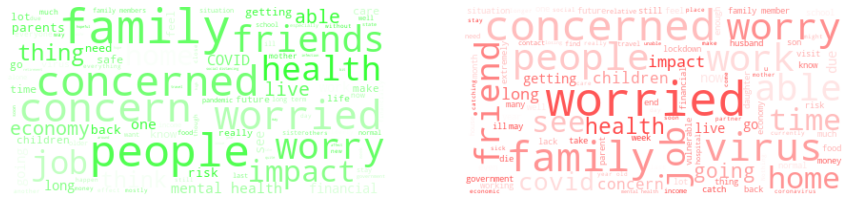

In [17]:
# Word cloud for positive and negative sentiments
def color_func_1(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(120, 100%%, %d%%)" % random.randint(60, 100)

def color_func_2(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(60, 100)

print("Word cloud for Apr 2020")
df_wordcloud = df_adult_mer[['anything_else_April2020','sentiment_April2020']]
df_wordcloud.dropna(inplace=True)
# print(df_wordcloud.shape)
text = ' '.join(df_wordcloud['anything_else_April2020']\
                [df_wordcloud['sentiment_April2020'].str.contains('POSITIVE')])

stop_words = STOPWORDS.update(["will"])

wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stop_words)\
                .generate(text)

text = ' '.join(df_wordcloud['anything_else_April2020']\
                [df_wordcloud['sentiment_April2020'].str.contains('NEGATIVE')])

wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stop_words)\
        .generate(text)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,2,1)
plt.imshow(wordcloud_pos.recolor(color_func=color_func_1, random_state=3),
           interpolation="bilinear");
plt.axis("off");
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg.recolor(color_func=color_func_2, random_state=3),
           interpolation="bilinear");
plt.axis("off");

In [18]:
print("Some sample positive examples: \n\n")
for i,row in df_wordcloud[['anything_else_April2020','sentiment_April2020']]\
                [df_wordcloud['sentiment_April2020'].str.contains('POSITIVE')]\
            [df_wordcloud['anything_else_April2020'].str.contains('worried')].sample(3).iterrows():
    print(row['sentiment_April2020'],row['anything_else_April2020'],'\n')

Some sample positive examples: 


('POSITIVE', 0.9913408) I'm not worried about getting it, but the concern is more so for my family members and friends. There is a financial strain but I know that there are other people who are suffering more from the pandemic more than I am.  

('POSITIVE', 0.9983594) I am in much better shape than a lot of other as my job is intact and will be for the forseable future.  I am just worried about how an extension of the current restrictions could impact the jobs of family members 

('POSITIVE', 0.9820943) My mum had pneumonia recently so I am worried  about her. Don't care about anything else. 



In [19]:
print("Some sample negative examples: \n\n")
for i,row in df_wordcloud[['anything_else_April2020','sentiment_April2020']]\
                [df_wordcloud['sentiment_April2020'].str.contains('NEGATIVE')]\
            [df_wordcloud['anything_else_April2020'].str.contains('worried')].sample(3).iterrows():
    print(row['sentiment_April2020'],row['anything_else_April2020'],'\n')

Some sample negative examples: 


('NEGATIVE', 0.9986173) when I have to go out I try to keep my social distance but other people don't seem to understand what that is or able to do it.I am worried about losing some contact with friends and family and this having an effect on future relationships. 

('NEGATIVE', 0.99761945) My son just atafted nursery before the coronavirus affected our area and I'm worried he will have forgot about it and maybe hard to settle him back in 

('NEGATIVE', 0.9990524) The impact on my university degree as it is harder to work from home and the forms of assessment have changed. I am worried my dad is more susceptible to get it cause of his health as well as my grandparents being over 70. I am worried it could impact the graduate job I am meant to start in September.  



Word cloud for Apr 2021


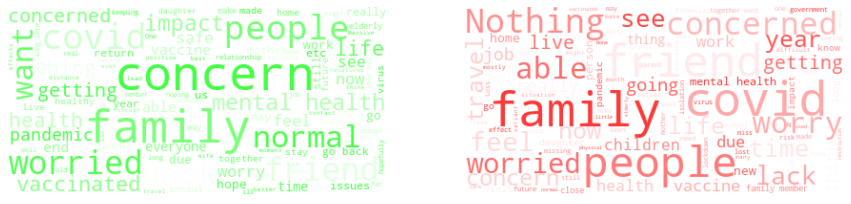

In [20]:
print("Word cloud for Apr 2021")
df_wordcloud = df_adult_mer[['anything_else_April2021','sentiment_April2021']]
df_wordcloud.dropna(inplace=True)
# print(df_wordcloud.shape)
text = ' '.join(df_wordcloud['anything_else_April2021']\
                [df_wordcloud['sentiment_April2021'].str.contains('POSITIVE')])

stop_words = STOPWORDS.update(["will"])

wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stop_words)\
                .generate(text)

text = ' '.join(df_wordcloud['anything_else_April2021']\
                [df_wordcloud['sentiment_April2021'].str.contains('NEGATIVE')])

wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stop_words)\
        .generate(text)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,2,1)
plt.imshow(wordcloud_pos.recolor(color_func=color_func_1, random_state=3),
           interpolation="bilinear");
plt.axis("off");
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg.recolor(color_func=color_func_2, random_state=3),
           interpolation="bilinear");
plt.axis("off");

In [21]:
df_adult_mer[['sentiment_April2020','sentiment_April2021']].isna().sum()

sentiment_April2020    258
sentiment_April2021    387
dtype: int64

Chossing sentiment, mood state and cowid worries related columns

In [22]:
df_sub = df_adult_mer[['ID','Apr_cms_ave',"Apr_cw_ave",'Apr_21_cms_ave','Apr_21_cw_ave',
                               'sentiment_April2020','sentiment_April2021']]

In [23]:
# df_sub.isna().sum()

In [24]:
df_sub.dropna(inplace=True)
df_sub.shape

(406, 7)

> We've 406 adults who had some sentiment info in both the periods Apr'20 and Apr'21

In [25]:
# Extracting the sentiment value from the col
df_sub['sentiment_April2020'] = df_sub['sentiment_April2020'].map(lambda x: eval(x)[0])
df_sub['sentiment_April2021'] = df_sub['sentiment_April2021'].map(lambda x: eval(x)[0])

In [26]:
df_tmp_1 = df_sub.groupby(['sentiment_April2020']).size().reset_index().rename(columns=
                                                                               {"sentiment_April2020":'Sentiment',
                                                                                0:"#Adults"})
df_tmp_1['Month'] ="April 2020"
df_tmp_2 = df_sub.groupby(['sentiment_April2021']).size().reset_index().rename(columns={"sentiment_April2021":'Sentiment',
                                                                                       0:"#Adults"})
df_tmp_2['Month'] ="April 2021"

df_sent_adult = pd.concat([df_tmp_1,df_tmp_2])
# df_sent_adult

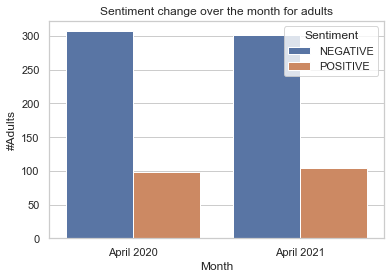

In [27]:
ax = sns.barplot(x="Month", y="#Adults", hue="Sentiment", data=df_sent_adult);
ax.set_title('Sentiment change over the month for adults');

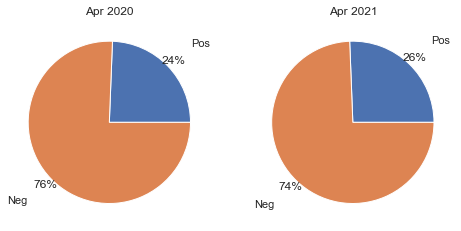

In [28]:
# Looking at positivity in the two periods
pos_per_2020 = (df_sub['sentiment_April2020']=='POSITIVE').sum()/len(df_sub)
pos_per_2021 = (df_sub['sentiment_April2021']=='POSITIVE').sum()/len(df_sub)

fig = plt.figure(figsize=[8,8])
# fig.set_figheight(15)
# fig.set_figwidth(15)

plt.subplot(1,2,1)
plt.pie([pos_per_2020,1-pos_per_2020], labels=['Pos','Neg'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.4);
plt.title('Apr 2020')
plt.subplot(1,2,2)
plt.pie([pos_per_2021,1-pos_per_2021], labels=['Pos','Neg'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.4);
plt.title('Apr 2021');

> <h3>Overall the positive sentiment is slightly improved

positivity is percentage of positive users over all users

In [29]:
# Rounding of the scores - e.g: scores b/w 1.5-2.5 will be changed 2
df_sub['Apr_cms_ave_rnd'] = df_sub['Apr_cms_ave'].round()
df_sub['Apr_cw_ave_rnd'] = df_sub['Apr_cw_ave'].round()

df_sub['Apr_21_cms_ave_rnd'] = df_sub['Apr_21_cms_ave'].round()
df_sub['Apr_21_cw_ave_rnd'] = df_sub['Apr_21_cw_ave'].round()

<h4>Checking positive sentiment relation with Mood states and how it is changing b/w Apr'2020 and Apr'2021

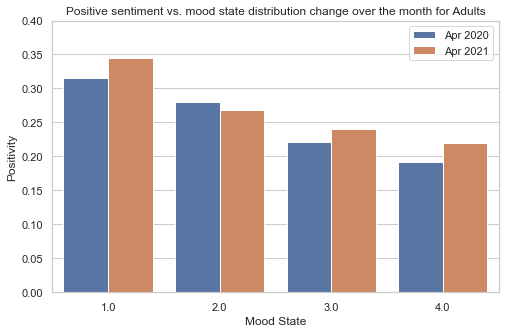

In [30]:
df_posper_Apr20 = pd.DataFrame(df_sub[df_sub['sentiment_April2020']=='POSITIVE']\
                    .groupby(['Apr_cms_ave_rnd']).size()/df_sub.groupby(['Apr_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cms_ave_rnd":"Mood State",
                                                    0:'Positivity'})
df_posper_Apr20['Month'] = 'Apr 2020'
df_posper_Apr21 = pd.DataFrame(df_sub[df_sub['sentiment_April2021']=='POSITIVE']\
                    .groupby(['Apr_21_cms_ave_rnd']).size()/df_sub.groupby(['Apr_21_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cms_ave_rnd":"Mood State",
                                                    0:'Positivity'})
df_posper_Apr21['Month'] = 'Apr 2021'
df_posper_adult = pd.concat([df_posper_Apr20,df_posper_Apr21])

fig = plt.figure(figsize=[8,5])
ax = sns.barplot(x="Mood State", y="Positivity", hue="Month", data=df_posper_adult);
ax.set_title('Positive sentiment vs. mood state distribution change over the month for Adults');
plt.legend(loc='upper right');
plt.xlim([-0.5,3.5]) #Very few users with mood state score <1  & >4
plt.ylim([0,0.4]);

<h4>Checking positive sentiment relation with covid worries and how it is changing b/w Apr'2020 and Apr'2021

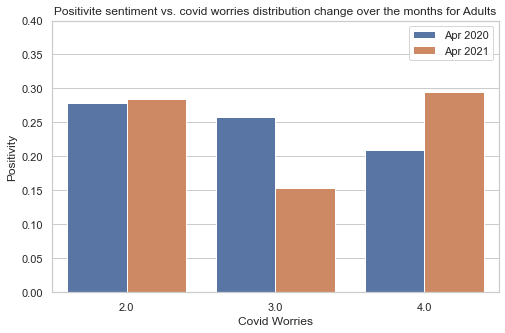

In [31]:
df_posper_Apr20 = pd.DataFrame(df_sub[df_sub['sentiment_April2020']=='POSITIVE']\
                    .groupby(['Apr_cw_ave_rnd']).size()/df_sub.groupby(['Apr_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cw_ave_rnd":"Covid Worries",
                                                    0:'Positivity'})
df_posper_Apr20['Month'] = 'Apr 2020'
df_posper_Apr21 = pd.DataFrame(df_sub[df_sub['sentiment_April2021']=='POSITIVE']\
                    .groupby(['Apr_21_cw_ave_rnd']).size()/df_sub.groupby(['Apr_21_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cw_ave_rnd":"Covid Worries",
                                                    0:'Positivity'})
df_posper_Apr21['Month'] = 'Apr 2021'
df_posper_adult = pd.concat([df_posper_Apr20,df_posper_Apr21])
df_posper_adult.dropna(inplace=True)

fig = plt.figure(figsize=[8,5])
ax = sns.barplot(x="Covid Worries", y="Positivity", hue="Month", data=df_posper_adult);
ax.set_title('Positivite sentiment vs. covid worries distribution change over the months for Adults');
plt.legend(loc='upper right');
plt.xlim([.5,3.5]) #Very few users with mood state score <1  & >4
plt.ylim([0,0.4]);

> <h3> In Apr 2020 & 2021 positivity and mood states show simialr trend -> As moodstates worsen positive sentiment declines.

> <h3>  In Apr 2020 as covid worries incresae the positivity is slightly declining, but this is not true for Apr 2021

<h4> How the scores change for people whose sentiments are changed

People changing from positive to negative : 70


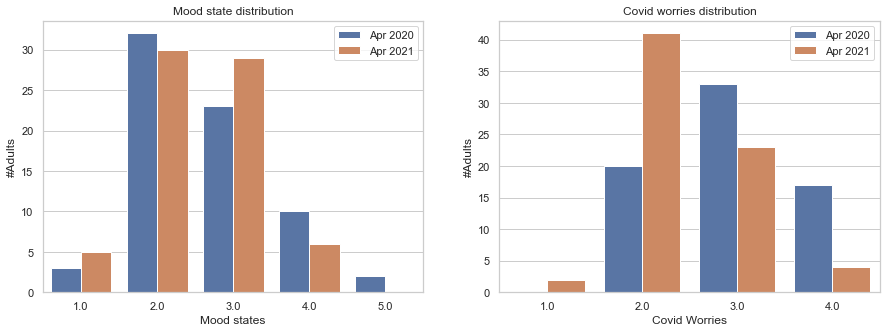

In [32]:
df_chng_pos_neg = df_sub[(df_sub['sentiment_April2020'] == 'POSITIVE') 
                         & (df_sub['sentiment_April2021'] == 'NEGATIVE')]
print(f"People changing from positive to negative : {len(df_chng_pos_neg)}")

df_posneg_Apr20 = pd.DataFrame(df_chng_pos_neg.groupby(['Apr_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cms_ave_rnd":"Mood states",
                                                    0:'#Adults'})
df_posneg_Apr20['Month'] = 'Apr 2020'
df_posneg_Apr21 = pd.DataFrame(df_chng_pos_neg.groupby(['Apr_21_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cms_ave_rnd":"Mood states",
                                                    0:'#Adults'})
df_posneg_Apr21['Month'] = 'Apr 2021'
df_posneg_adult = pd.concat([df_posneg_Apr20,df_posneg_Apr21])
df_posneg_adult.dropna(inplace=True)

fig = plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sns.barplot(x="Mood states", y="#Adults", hue="Month", data=df_posneg_adult);
ax.set_title("Mood state distribution");
plt.legend(loc='upper right');


df_posneg_Apr20 = pd.DataFrame(df_chng_pos_neg.groupby(['Apr_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cw_ave_rnd":"Covid Worries",
                                                    0:'#Adults'})
df_posneg_Apr20['Month'] = 'Apr 2020'
df_posneg_Apr21 = pd.DataFrame(df_chng_pos_neg.groupby(['Apr_21_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cw_ave_rnd":"Covid Worries",
                                                    0:'#Adults'})
df_posneg_Apr21['Month'] = 'Apr 2021'
df_posneg_adult = pd.concat([df_posneg_Apr20,df_posneg_Apr21])
df_posneg_adult.dropna(inplace=True)

plt.subplot(1,2,2)
ax = sns.barplot(x="Covid Worries", y="#Adults", hue="Month", data=df_posneg_adult);
ax.set_title("Covid worries distribution");
plt.legend(loc='upper right');
plt.show()


> <h4> For, people whose sentiment changed to negative
        
    The mood state slightly worsened, more people with score 3
    But, covid worry shows an improvment in 2021

People changing from negative to positive : 75


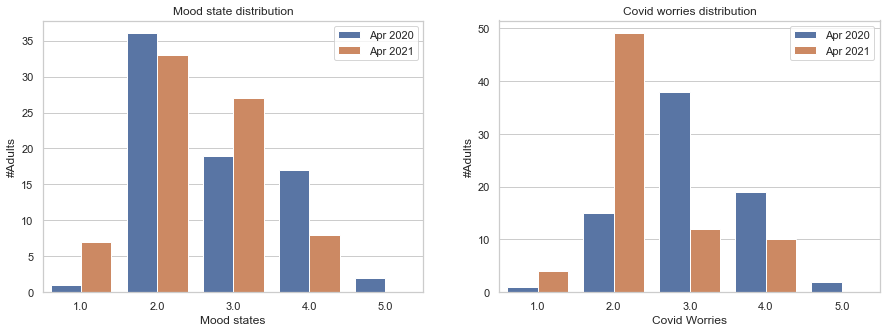

In [33]:
df_chng_neg_pos = df_sub[(df_sub['sentiment_April2020'] == 'NEGATIVE') 
                         & (df_sub['sentiment_April2021'] == 'POSITIVE')]
print(f"People changing from negative to positive : {len(df_chng_neg_pos)}")

df_negpos_Apr20 = pd.DataFrame(df_chng_neg_pos.groupby(['Apr_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cms_ave_rnd":"Mood states",
                                                    0:'#Adults'})
df_negpos_Apr20['Month'] = 'Apr 2020'
df_negpos_Apr21 = pd.DataFrame(df_chng_neg_pos.groupby(['Apr_21_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cms_ave_rnd":"Mood states",
                                                    0:'#Adults'})
df_negpos_Apr21['Month'] = 'Apr 2021'
df_negpos_adult = pd.concat([df_negpos_Apr20,df_negpos_Apr21])
df_negpos_adult.dropna(inplace=True)

fig = plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sns.barplot(x="Mood states", y="#Adults", hue="Month", data=df_negpos_adult);
ax.set_title("Mood state distribution");
plt.legend(loc='upper right');


df_negpos_Apr20 = pd.DataFrame(df_chng_neg_pos.groupby(['Apr_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cw_ave_rnd":"Covid Worries",
                                                    0:'#Adults'})
df_negpos_Apr20['Month'] = 'Apr 2020'
df_negpos_Apr21 = pd.DataFrame(df_chng_neg_pos.groupby(['Apr_21_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cw_ave_rnd":"Covid Worries",
                                                    0:'#Adults'})
df_negpos_Apr21['Month'] = 'Apr 2021'
df_negpos_adult = pd.concat([df_negpos_Apr20,df_negpos_Apr21])
df_negpos_adult.dropna(inplace=True)

plt.subplot(1,2,2)
ax = sns.barplot(x="Covid Worries", y="#Adults", hue="Month", data=df_negpos_adult);
ax.set_title("Covid worries distribution");
plt.legend(loc='upper right');
plt.show()

> <h4>For, people whose sentiment changed from negative to positive 
    
    Lesser people in bad mood brackets and less covid worried

## Sentiment analysis for parents

In [34]:
df_parent_mer = df_parent_sel_feat.merge(df_any_else_parent_emot_sen,on='ID')

print(df_parent_mer.shape)
df_parent_mer.head()

(892, 32)


,ID,country,age,sex,informant_race2,location,insurance_Apr_20,govassist,physicalhealth_Apr_20,Apr_cms_ave,Apr_cw_ave,Apr_lc_subtype,financedifficulty_Apr_20,May_cms_ave,May_cw_ave,May_lc_subtype,financedifficulty_May_20,physicalhealth_Nov_20,Nov_cms_ave,Nov_cw_ave,Nov_lc_subtype,financedifficulty_Nov_20,insurance_Apr_21,Apr_21_cms_ave,Apr_21_cw_ave,financedifficulty_Apr_21,anything_else_April2020,anything_else_April2021,emotion_April2020,sentiment_April2020,emotion_April2021,sentiment_April2021
0,003f374a,186.0,35.0,1.0,White,4.0,7.0,1.0,2.0,2.4,2.5,2.0,3.0,2.7,2.666667,2.0,3.0,3.0,2.5,2.000000,1.0,2.0,7,1.9,2.333333,1.0,Not attending school and the emotional and soc...,Time away from friends and family,sadness,"('NEGATIVE', 0.99949884)",anger,"('NEGATIVE', 0.9975896)"
1,00662b3f,186.0,32.0,2.0,White,1.0,6.0,0.0,5.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,3.0,7,2.4,1.166667,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,00b76a23,187.0,27.0,1.0,White,2.0,2.0,0.0,1.0,2.1,1.5,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2,1.6,1.333333,1.0,NaN,Nothing,NaN,NaN,fear,"('NEGATIVE', 0.9985338)"
3,00f4a445,186.0,34.0,2.0,White,4.0,7.0,0.0,1.0,2.6,4.0,3.0,1.0,2.5,3.000000,2.0,1.0,1.0,1.9,2.333333,1.0,2.0,7,1.6,1.333333,3.0,She is worried about the bad germs. She worrie...,She's missing out on so much at school - no Ch...,fear,"('NEGATIVE', 0.99940103)",sadness,"('NEGATIVE', 0.99943936)"
4,0145f511,187.0,32.0,1.0,White,3.0,2.0,0.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,2,2.7,2.166667,1.0,I'm concerned about my child not progressing i...,I'm concerned about my child's ability to go b...,fear,"('NEGATIVE', 0.9929065)",fear,"('NEGATIVE', 0.9985065)"


In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Word cloud for Apr 2020


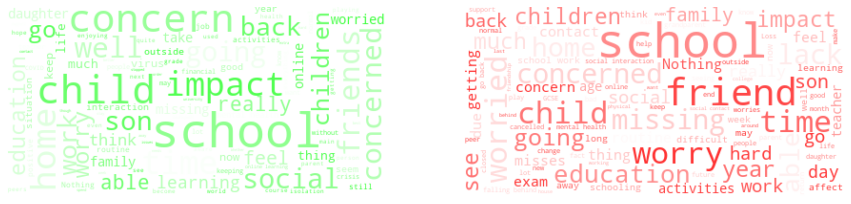

In [36]:
# Word cloud for positive and negative sentiments
def color_func_1(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(120, 100%%, %d%%)" % random.randint(60, 100)

def color_func_2(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(60, 100)

print("Word cloud for Apr 2020")
df_wordcloud = df_parent_mer[['anything_else_April2020','sentiment_April2020']]
df_wordcloud.dropna(inplace=True)
# print(df_wordcloud.shape)
text = ' '.join(df_wordcloud['anything_else_April2020']\
                [df_wordcloud['sentiment_April2020'].str.contains('POSITIVE')])

stop_words = STOPWORDS.update(["will"])

wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stop_words)\
                .generate(text)

text = ' '.join(df_wordcloud['anything_else_April2020']\
                [df_wordcloud['sentiment_April2020'].str.contains('NEGATIVE')])

wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stop_words)\
        .generate(text)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,2,1)
plt.imshow(wordcloud_pos.recolor(color_func=color_func_1, random_state=3),
           interpolation="bilinear");
plt.axis("off");
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg.recolor(color_func=color_func_2, random_state=3),
           interpolation="bilinear");
plt.axis("off");

In [37]:
print("Some sample positive examples: \n\n")
for i,row in df_wordcloud[['anything_else_April2020','sentiment_April2020']]\
                [df_wordcloud['sentiment_April2020'].str.contains('POSITIVE')]\
            [df_wordcloud['anything_else_April2020'].str.contains('worried')].sample(3).iterrows():
    print(row['sentiment_April2020'],row['anything_else_April2020'],'\n')

Some sample positive examples: 


('POSITIVE', 0.9966317) I feel that my role as a parent is to minimise worry and disruption to my child as much as possible. She is not worried about the consequences of the illness but the impact for her is that of missing family and friends. 

('POSITIVE', 0.985522) I'm generally just worried about my son getting covid. With him being disabled I feel like he would be vulnerable, also I worry about how much he's missing his grandparents because he can't speak properly. He can't exactly tell me. 

('POSITIVE', 0.99761224) I'm deeply passionate about new approaches to teaching and learning, and my greatest concern is with schools.     At this point, my child is very happy being at home and learning what she finds interesting and at her own pace. I am worried that the longer the crisis continues and my daughter gets used to a more relaxed model of learning, the more difficult it will be for her to re-adapt to the school environment when schools re-open. 

In [38]:
print("Some sample negative examples: \n\n")
for i,row in df_wordcloud[['anything_else_April2020','sentiment_April2020']]\
                [df_wordcloud['sentiment_April2020'].str.contains('NEGATIVE')]\
            [df_wordcloud['anything_else_April2020'].str.contains('worried')].sample(3).iterrows():
    print(row['sentiment_April2020'],row['anything_else_April2020'],'\n')

Some sample negative examples: 


('NEGATIVE', 0.99421304) I'm worried whether he can catch up when he moves up to the next grade. 

('NEGATIVE', 0.99904025) He is worried he is going to lie Dr his parents 

('NEGATIVE', 0.9994017) Lack of schooling.  Expected to home school but I've been ill too.  My son has little attention and motivation so this is going to be a problem.  It makes me worried for his future.  He has autism. 



Word cloud for Apr 2021


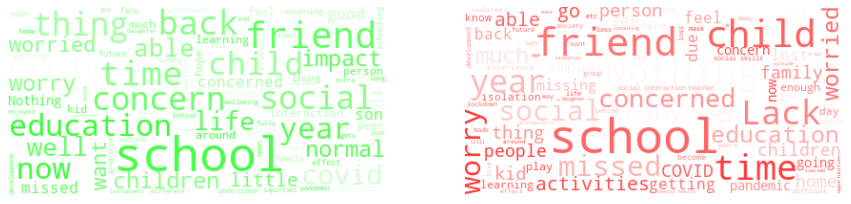

In [39]:
print("Word cloud for Apr 2021")
df_wordcloud = df_parent_mer[['anything_else_April2021','sentiment_April2021']]
df_wordcloud.dropna(inplace=True)
# print(df_wordcloud.shape)
text = ' '.join(df_wordcloud['anything_else_April2021']\
                [df_wordcloud['sentiment_April2021'].str.contains('POSITIVE')])

stop_words = STOPWORDS.update(["will","think"])

wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stop_words)\
                .generate(text)

text = ' '.join(df_wordcloud['anything_else_April2021']\
                [df_wordcloud['sentiment_April2021'].str.contains('NEGATIVE')])

wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stop_words)\
        .generate(text)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,2,1)
plt.imshow(wordcloud_pos.recolor(color_func=color_func_1, random_state=3),
           interpolation="bilinear");
plt.axis("off");
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg.recolor(color_func=color_func_2, random_state=3),
           interpolation="bilinear");
plt.axis("off");

In [40]:
df_parent_mer[['sentiment_April2020','sentiment_April2021']].isna().sum()

sentiment_April2020    194
sentiment_April2021    299
dtype: int64

Chossing sentiment, mood state and cowid worries related columns

In [41]:
df_sub = df_parent_mer[['ID','Apr_cms_ave',"Apr_cw_ave",'Apr_21_cms_ave','Apr_21_cw_ave',
                               'sentiment_April2020','sentiment_April2021']]

# df_sub.isna().sum()

df_sub.dropna(inplace=True)
df_sub.shape

(319, 7)

> We've 319 parents who had some sentiment info in both the periods Apr'20 and Apr'21

In [42]:
# Extracting the sentiment value from the col
df_sub['sentiment_April2020'] = df_sub['sentiment_April2020'].map(lambda x: eval(x)[0])
df_sub['sentiment_April2021'] = df_sub['sentiment_April2021'].map(lambda x: eval(x)[0])

df_tmp_1 = df_sub.groupby(['sentiment_April2020']).size().reset_index().rename(columns=
                                                                               {"sentiment_April2020":'Sentiment',
                                                                                0:"Users"})
df_tmp_1['Month'] ="April 2020"
df_tmp_2 = df_sub.groupby(['sentiment_April2021']).size().reset_index().rename(columns={"sentiment_April2021":'Sentiment',
                                                                                       0:"Users"})
df_tmp_2['Month'] ="April 2021"

df_sent_parent = pd.concat([df_tmp_1,df_tmp_2])
# df_sent_parent

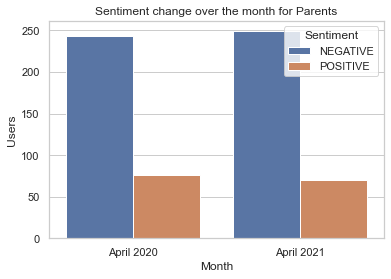

In [43]:
ax = sns.barplot(x="Month", y="Users", hue="Sentiment", data=df_sent_parent);
ax.set_title('Sentiment change over the month for Parents');

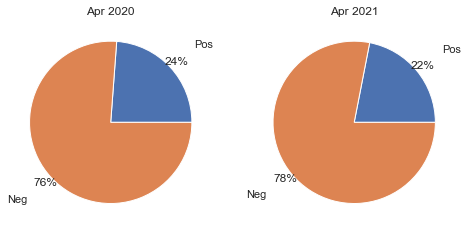

In [44]:
# Looking at positivity in the two periods
pos_per_2020 = (df_sub['sentiment_April2020']=='POSITIVE').sum()/len(df_sub)
pos_per_2021 = (df_sub['sentiment_April2021']=='POSITIVE').sum()/len(df_sub)

fig = plt.figure(figsize=[8,8])
# fig.set_figheight(15)
# fig.set_figwidth(15)

plt.subplot(1,2,1)
plt.pie([pos_per_2020,1-pos_per_2020], labels=['Pos','Neg'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.4);
plt.title('Apr 2020')
plt.subplot(1,2,2)
plt.pie([pos_per_2021,1-pos_per_2021], labels=['Pos','Neg'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.4);
plt.title('Apr 2021');

> <h3>Overall the positive sentiment is slightly decresed

positivity is percentage of positive users over all users

In [45]:
# Rounding of the scores - e.g: scores b/w 1.5-2.5 will be changed 2
df_sub['Apr_cms_ave_rnd'] = df_sub['Apr_cms_ave'].round()
df_sub['Apr_cw_ave_rnd'] = df_sub['Apr_cw_ave'].round()

df_sub['Apr_21_cms_ave_rnd'] = df_sub['Apr_21_cms_ave'].round()
df_sub['Apr_21_cw_ave_rnd'] = df_sub['Apr_21_cw_ave'].round()

<h4>Checking positive sentiment relation with Mood states and how it is changing b/w Apr'2020 and Apr'2021

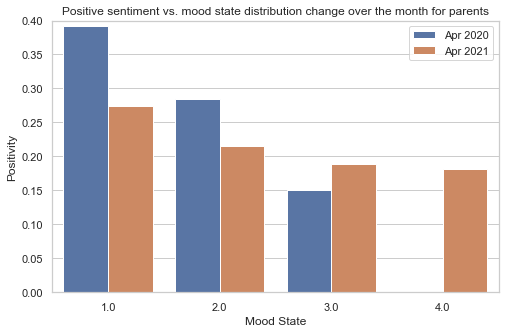

In [46]:
df_posper_Apr20 = pd.DataFrame(df_sub[df_sub['sentiment_April2020']=='POSITIVE']\
                    .groupby(['Apr_cms_ave_rnd']).size()/df_sub.groupby(['Apr_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cms_ave_rnd":"Mood State",
                                                    0:'Positivity'})
df_posper_Apr20['Month'] = 'Apr 2020'
df_posper_Apr21 = pd.DataFrame(df_sub[df_sub['sentiment_April2021']=='POSITIVE']\
                    .groupby(['Apr_21_cms_ave_rnd']).size()/df_sub.groupby(['Apr_21_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cms_ave_rnd":"Mood State",
                                                    0:'Positivity'})
df_posper_Apr21['Month'] = 'Apr 2021'
df_posper_parent = pd.concat([df_posper_Apr20,df_posper_Apr21])

fig = plt.figure(figsize=[8,5])
ax = sns.barplot(x="Mood State", y="Positivity", hue="Month", data=df_posper_parent);
ax.set_title('Positive sentiment vs. mood state distribution change over the month for parents');
plt.legend(loc='upper right');
plt.xlim([-0.5,3.5]) #Very few users with mood state score <1  & >4
plt.ylim([0,0.4]);

> <h3> In Apr 2020 & 2021 positivity and mood states show simialr trend -> As moodstates worsen positive sentiment declines.

<h4>Checking positive sentiment relation with covid worries and how it is changing b/w Apr'2020 and Apr'2021

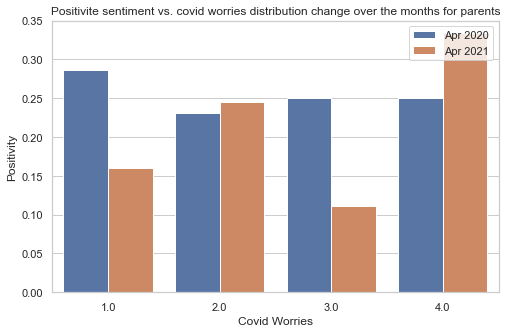

In [47]:
df_posper_Apr20 = pd.DataFrame(df_sub[df_sub['sentiment_April2020']=='POSITIVE']\
                    .groupby(['Apr_cw_ave_rnd']).size()/df_sub.groupby(['Apr_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cw_ave_rnd":"Covid Worries",
                                                    0:'Positivity'})
df_posper_Apr20['Month'] = 'Apr 2020'
df_posper_Apr21 = pd.DataFrame(df_sub[df_sub['sentiment_April2021']=='POSITIVE']\
                    .groupby(['Apr_21_cw_ave_rnd']).size()/df_sub.groupby(['Apr_21_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cw_ave_rnd":"Covid Worries",
                                                    0:'Positivity'})
df_posper_Apr21['Month'] = 'Apr 2021'
df_posper_parent = pd.concat([df_posper_Apr20,df_posper_Apr21])
df_posper_parent.dropna(inplace=True)

fig = plt.figure(figsize=[8,5])
ax = sns.barplot(x="Covid Worries", y="Positivity", hue="Month", data=df_posper_parent);
ax.set_title('Positivite sentiment vs. covid worries distribution change over the months for parents');
plt.legend(loc='upper right');

> <h3>  Covid worries and positivity doesn't seem to follow same trend

<h4> How the scores change for people whose sentiments are changed

People changing from positive to negative : 55


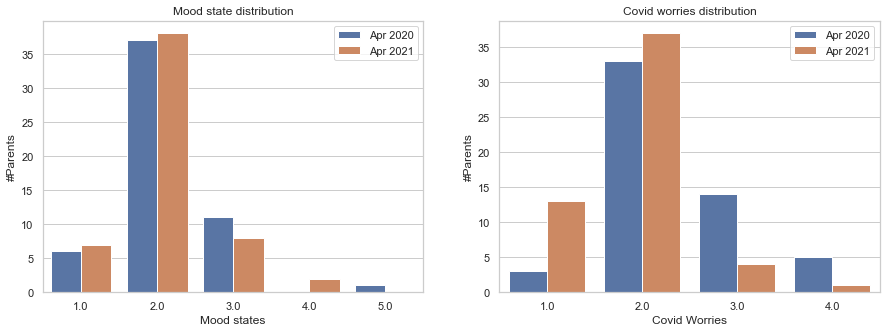

In [48]:
df_chng_pos_neg = df_sub[(df_sub['sentiment_April2020'] == 'POSITIVE') 
                         & (df_sub['sentiment_April2021'] == 'NEGATIVE')]
print(f"People changing from positive to negative : {len(df_chng_pos_neg)}")

df_posneg_Apr20 = pd.DataFrame(df_chng_pos_neg.groupby(['Apr_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cms_ave_rnd":"Mood states",
                                                    0:'#Parents'})
df_posneg_Apr20['Month'] = 'Apr 2020'
df_posneg_Apr21 = pd.DataFrame(df_chng_pos_neg.groupby(['Apr_21_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cms_ave_rnd":"Mood states",
                                                    0:'#Parents'})
df_posneg_Apr21['Month'] = 'Apr 2021'
df_posneg_parent = pd.concat([df_posneg_Apr20,df_posneg_Apr21])
df_posneg_parent.dropna(inplace=True)

fig = plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sns.barplot(x="Mood states", y="#Parents", hue="Month", data=df_posneg_parent);
ax.set_title("Mood state distribution");
plt.legend(loc='upper right');


df_posneg_Apr20 = pd.DataFrame(df_chng_pos_neg.groupby(['Apr_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cw_ave_rnd":"Covid Worries",
                                                    0:'#Parents'})
df_posneg_Apr20['Month'] = 'Apr 2020'
df_posneg_Apr21 = pd.DataFrame(df_chng_pos_neg.groupby(['Apr_21_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cw_ave_rnd":"Covid Worries",
                                                    0:'#Parents'})
df_posneg_Apr21['Month'] = 'Apr 2021'
df_posneg_parent = pd.concat([df_posneg_Apr20,df_posneg_Apr21])
df_posneg_parent.dropna(inplace=True)

plt.subplot(1,2,2)
ax = sns.barplot(x="Covid Worries", y="#Parents", hue="Month", data=df_posneg_parent);
ax.set_title("Covid worries distribution");
plt.legend(loc='upper right');
plt.show()


> <h4> For, people whose sentiment changed to negative
        
    Mood states are almost the seem
    covid worry shows an improvment in 2021

People changing from negative to positive : 49


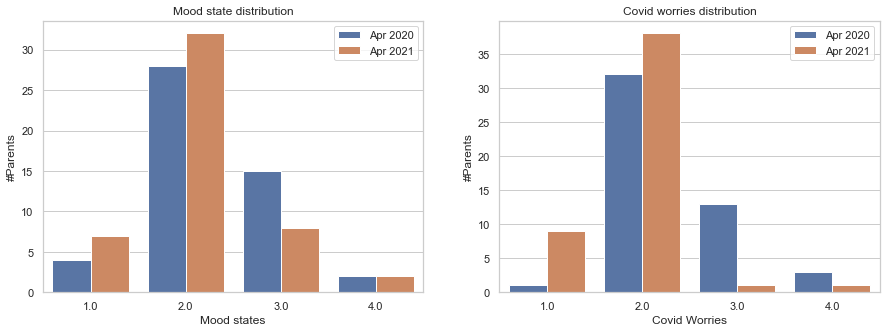

In [49]:
df_chng_neg_pos = df_sub[(df_sub['sentiment_April2020'] == 'NEGATIVE') 
                         & (df_sub['sentiment_April2021'] == 'POSITIVE')]
print(f"People changing from negative to positive : {len(df_chng_neg_pos)}")

df_negpos_Apr20 = pd.DataFrame(df_chng_neg_pos.groupby(['Apr_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cms_ave_rnd":"Mood states",
                                                    0:'#Parents'})
df_negpos_Apr20['Month'] = 'Apr 2020'
df_negpos_Apr21 = pd.DataFrame(df_chng_neg_pos.groupby(['Apr_21_cms_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cms_ave_rnd":"Mood states",
                                                    0:'#Parents'})
df_negpos_Apr21['Month'] = 'Apr 2021'
df_negpos_parent = pd.concat([df_negpos_Apr20,df_negpos_Apr21])
df_negpos_parent.dropna(inplace=True)

fig = plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sns.barplot(x="Mood states", y="#Parents", hue="Month", data=df_negpos_parent);
ax.set_title("Mood state distribution");
plt.legend(loc='upper right');


df_negpos_Apr20 = pd.DataFrame(df_chng_neg_pos.groupby(['Apr_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_cw_ave_rnd":"Covid Worries",
                                                    0:'#Parents'})
df_negpos_Apr20['Month'] = 'Apr 2020'
df_negpos_Apr21 = pd.DataFrame(df_chng_neg_pos.groupby(['Apr_21_cw_ave_rnd']).size())\
                    .reset_index().rename(columns = {"Apr_21_cw_ave_rnd":"Covid Worries",
                                                    0:'#Parents'})
df_negpos_Apr21['Month'] = 'Apr 2021'
df_negpos_parent = pd.concat([df_negpos_Apr20,df_negpos_Apr21])
df_negpos_parent.dropna(inplace=True)

plt.subplot(1,2,2)
ax = sns.barplot(x="Covid Worries", y="#Parents", hue="Month", data=df_negpos_parent);
ax.set_title("Covid worries distribution");
plt.legend(loc='upper right');
plt.show()

> <h4>For, people whose sentiment changed from negative to positive 
    
    Lesser people in bad mood brackets and less covid worried

# Emotion data for adults and parents

## Adults

In [50]:
df_adult_mer = df_adult_sel_feat.merge(df_any_else_adult_emot_sen,on='ID')

print(df_adult_mer.shape)
df_adult_mer.head()

(1173, 32)


,ID,country,age,sex,informant_race2,location,insurance_Apr_20,govassist,physicalhealth_Apr_20,Apr_cms_ave,Apr_cw_ave,Apr_lc_subtype,financedifficulty_Apr_20,May_cms_ave,May_cw_ave,May_lc_subtype,financedifficulty_May_20,physicalhealth_Nov_20,Nov_cms_ave,Nov_cw_ave,Nov_lc_subtype,financedifficulty_Nov_20,insurance_Apr_21,Apr_21_cms_ave,Apr_21_cw_ave,financedifficulty_Apr_21,anything_else_April2020,anything_else_April2021,emotion_April2020,sentiment_April2020,emotion_April2021,sentiment_April2021
0,00babb90,186.0,29.0,2.0,White,1.0,2.0,0.0,3.0,3.7,2.500000,2.0,3.0,4.1,3.666667,2.0,4.0,2.0,3.5,2.833333,2.0,1.0,2.0,2.8,2.166667,4.0,Mental health is declining and I cant see my f...,"normality and how we will adapt, social anxierty",sadness,"('NEGATIVE', 0.99907184)",anger,"('POSITIVE', 0.995627)"
1,00db60f1,186.0,53.0,2.0,White,4.0,7.0,1.0,1.0,3.2,2.500000,2.0,3.0,3.1,2.666667,2.0,4.0,1.0,2.8,2.666667,1.0,3.0,7.0,2.9,2.166667,2.0,Some family members not observing social dista...,Worries they may be lonely,fear,"('NEGATIVE', 0.99874055)",sadness,"('NEGATIVE', 0.9944463)"
2,01297d76,186.0,51.0,2.0,Other,2.0,6.0,0.0,2.0,2.5,3.166667,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,7.0,1.8,2.333333,1.0,My kids university education has been disrupte...,My kids are missing out on in-person learning ...,fear,"('NEGATIVE', 0.9990679)",sadness,"('NEGATIVE', 0.99879074)"
3,01559bfb,187.0,37.0,2.0,White,1.0,2.0,0.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,2.0,2.0,2.5,2.500000,2.0,NaN,I lost touch with friends whom I didn't see ve...,NaN,NaN,sadness,"('NEGATIVE', 0.9943974)"
4,0180ea1d,186.0,58.0,2.0,White,4.0,6.0,1.0,4.0,2.7,3.166667,2.0,1.0,2.9,3.000000,3.0,2.0,4.0,3.1,3.500000,2.0,1.0,7.0,2.9,2.833333,1.0,I am really concerned I could die if I catch it,no,fear,"('NEGATIVE', 0.998409)",anger,"('NEGATIVE', 0.9980653)"


In [51]:
df_sub = df_adult_mer[['ID','Apr_cms_ave',"Apr_cw_ave",'Apr_21_cms_ave','Apr_21_cw_ave','emotion_April2020','emotion_April2021']]

In [52]:
df_sub=df_sub[df_sub['emotion_April2020']!='love']
df_sub.dropna(inplace=True)
df_sub.shape

(404, 7)

> 404 Adults with emotion tagged

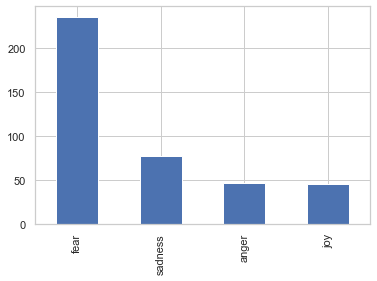

In [53]:
df_sub['emotion_April2020'].value_counts().plot.bar();

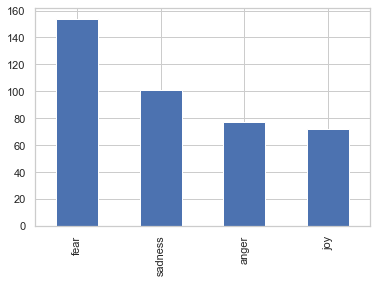

In [54]:
df_sub['emotion_April2021'].value_counts().plot.bar();

<h3> Fear is the most prominent emotion, follwed by sadness
    
        in Apr'2020 fear is much more prominent than other emotions.

In [55]:
# plt_categories = df_sub['emotion_April2020'].unique()
plt_categories = ['fear','sadness','anger','joy']
plt_categories;

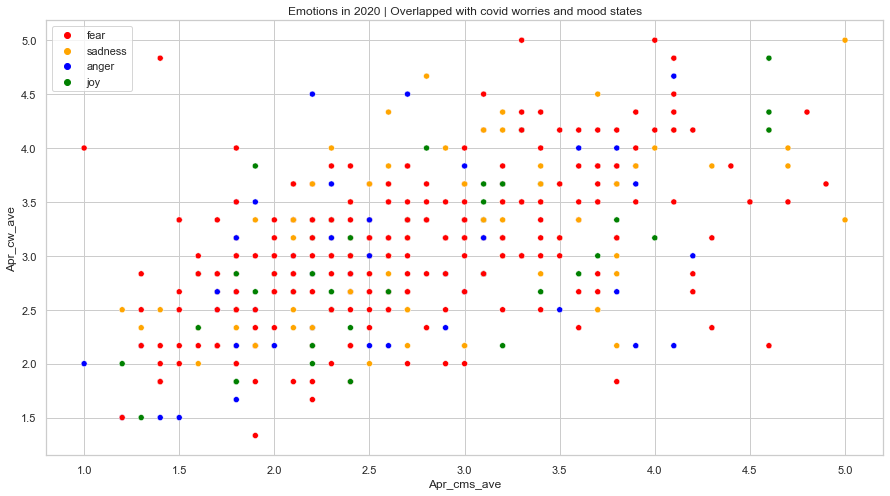

In [56]:
fig = plt.figure(figsize=[15,8])

sns.scatterplot(data=df_sub, x="Apr_cms_ave", y="Apr_cw_ave", hue="emotion_April2020",
               hue_order=plt_categories,palette=['red','orange','blue','green']);
plt.legend(loc='upper left');
plt.title('Emotions in 2020 | Overlapped with covid worries and mood states');

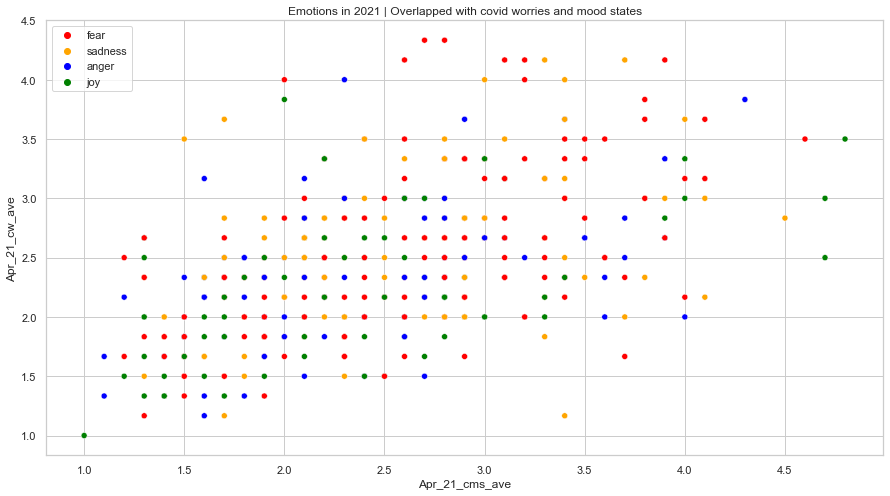

In [57]:
fig = plt.figure(figsize=[15,8])

sns.scatterplot(data=df_sub, x="Apr_21_cms_ave", y="Apr_21_cw_ave", hue="emotion_April2021",
               hue_order=plt_categories,palette=['red','orange','blue','green']);
plt.legend(loc='upper left');
plt.title('Emotions in 2021 | Overlapped with covid worries and mood states');

<h3> In Apr 2021 data, most of the emotions are scatterd around. But, Joy can be seen clustered around better mood and less covid worries

## Parents

In [58]:
df_parent_mer = df_parent_sel_feat.merge(df_any_else_parent_emot_sen,on='ID')

print(df_parent_mer.shape)
df_parent_mer.head()

(892, 32)


,ID,country,age,sex,informant_race2,location,insurance_Apr_20,govassist,physicalhealth_Apr_20,Apr_cms_ave,Apr_cw_ave,Apr_lc_subtype,financedifficulty_Apr_20,May_cms_ave,May_cw_ave,May_lc_subtype,financedifficulty_May_20,physicalhealth_Nov_20,Nov_cms_ave,Nov_cw_ave,Nov_lc_subtype,financedifficulty_Nov_20,insurance_Apr_21,Apr_21_cms_ave,Apr_21_cw_ave,financedifficulty_Apr_21,anything_else_April2020,anything_else_April2021,emotion_April2020,sentiment_April2020,emotion_April2021,sentiment_April2021
0,003f374a,186.0,35.0,1.0,White,4.0,7.0,1.0,2.0,2.4,2.5,2.0,3.0,2.7,2.666667,2.0,3.0,3.0,2.5,2.000000,1.0,2.0,7,1.9,2.333333,1.0,Not attending school and the emotional and soc...,Time away from friends and family,sadness,"('NEGATIVE', 0.99949884)",anger,"('NEGATIVE', 0.9975896)"
1,00662b3f,186.0,32.0,2.0,White,1.0,6.0,0.0,5.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,3.0,7,2.4,1.166667,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,00b76a23,187.0,27.0,1.0,White,2.0,2.0,0.0,1.0,2.1,1.5,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2,1.6,1.333333,1.0,NaN,Nothing,NaN,NaN,fear,"('NEGATIVE', 0.9985338)"
3,00f4a445,186.0,34.0,2.0,White,4.0,7.0,0.0,1.0,2.6,4.0,3.0,1.0,2.5,3.000000,2.0,1.0,1.0,1.9,2.333333,1.0,2.0,7,1.6,1.333333,3.0,She is worried about the bad germs. She worrie...,She's missing out on so much at school - no Ch...,fear,"('NEGATIVE', 0.99940103)",sadness,"('NEGATIVE', 0.99943936)"
4,0145f511,187.0,32.0,1.0,White,3.0,2.0,0.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,2,2.7,2.166667,1.0,I'm concerned about my child not progressing i...,I'm concerned about my child's ability to go b...,fear,"('NEGATIVE', 0.9929065)",fear,"('NEGATIVE', 0.9985065)"


In [59]:
df_sub = df_parent_mer[['ID','Apr_cms_ave',"Apr_cw_ave",'Apr_21_cms_ave','Apr_21_cw_ave','emotion_April2020','emotion_April2021']]

df_sub = df_sub[df_sub['emotion_April2021'] != 'metal']

df_sub.dropna(inplace=True)
df_sub.shape

(318, 7)

> 318 parents with emotion tagging in both Apr'2020 and 2021

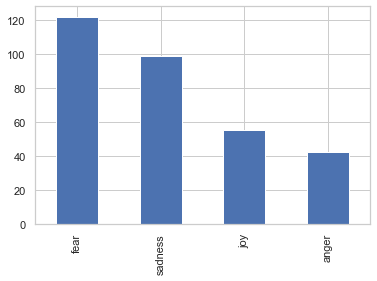

In [60]:
df_sub['emotion_April2020'].value_counts().plot.bar();

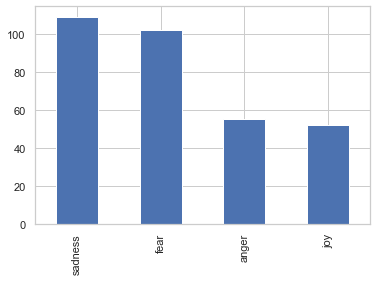

In [61]:
df_sub['emotion_April2021'].value_counts().plot.bar();

<h3> Fear is most prominent in Apr'2020, closely followed by sadness. 
    
    But, in Apr'2021 sadness is the common emotion, closely followed by fear.

In [62]:
# plt_categories = df_sub['emotion_April2020'].unique()
plt_categories = ['fear','sadness','anger','joy']
plt_categories;

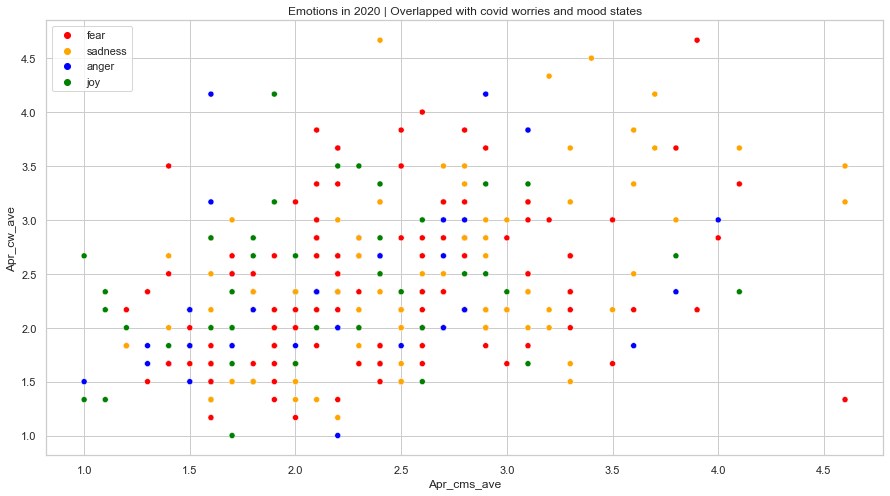

In [63]:
fig = plt.figure(figsize=[15,8])

sns.scatterplot(data=df_sub, x="Apr_cms_ave", y="Apr_cw_ave", hue="emotion_April2020",
               hue_order=plt_categories,palette=['red','orange','blue','green']);
plt.legend(loc='upper left');
plt.title('Emotions in 2020 | Overlapped with covid worries and mood states');

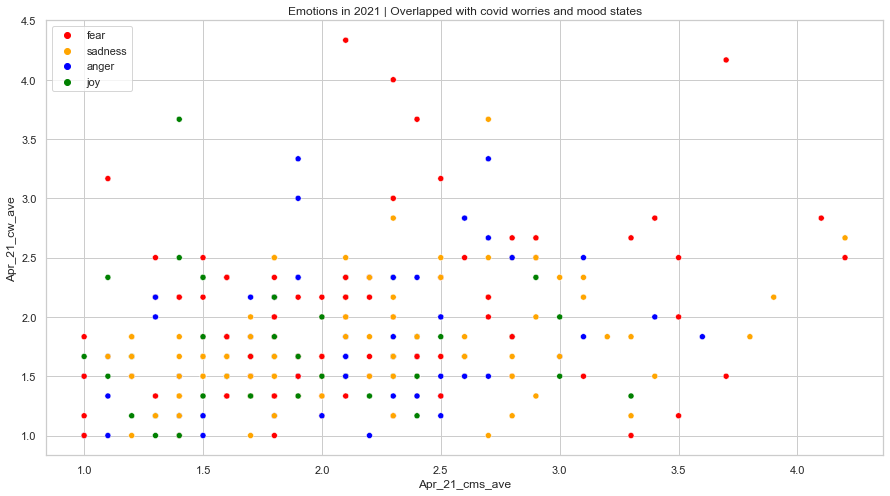

In [64]:
fig = plt.figure(figsize=[15,8])

sns.scatterplot(data=df_sub, x="Apr_21_cms_ave", y="Apr_21_cw_ave", hue="emotion_April2021",
               hue_order=plt_categories,palette=['red','orange','blue','green']);
plt.legend(loc='upper left');
plt.title('Emotions in 2021 | Overlapped with covid worries and mood states');

<h3> In Apr 2020 and 2021 data, Joy can be seen clustered around better mood and less covid worries